## CSE 881 Final Project 

Stephen Lee, Nickolaus White, Mark Carravallah

## Libraries

In [23]:
import pandas as pd
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
from datetime import datetime
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import itertools
import warnings


## Load in data

In [2]:
# Load csv into dataframe
df1 = pd.read_csv('NYPD_Complaint_Data_Historic.csv', low_memory=False)
df2 = pd.read_csv('NYPD_Complaint.csv', low_memory=False)

In [3]:
df2.head()

CMPLNT_NUM CMPLNT_FR_DT CMPLNT_FR_TM CMPLNT_TO_DT CMPLNT_TO_TM      RPT_DT  \
0   736216184   09/30/2016     23:25:00   09/30/2016     23:25:00  09/30/2016   
1   294332956   09/30/2016     23:16:00   09/30/2016     23:21:00  09/30/2016   
2   852981427   09/30/2016     23:00:00   09/30/2016     23:05:00  09/30/2016   
3   369976063   09/30/2016     23:00:00          NaN          NaN  09/30/2016   
4   117213771   09/30/2016     23:00:00   09/30/2016     23:10:00  09/30/2016   

   KY_CD                     OFNS_DESC  PD_CD                      PD_DESC  \
0    236             DANGEROUS WEAPONS  782.0     WEAPONS, POSSESSION, ETC   
1    344  ASSAULT 3 & RELATED OFFENSES  101.0                    ASSAULT 3   
2    235               DANGEROUS DRUGS  567.0  MARIJUANA, POSSESSION 4 & 5   
3    118             DANGEROUS WEAPONS  793.0         WEAPONS POSSESSION 3   
4    578                 HARRASSMENT 2  637.0   HARASSMENT,SUBD 1,CIVILIAN   

   ... ADDR_PCT_CD LOC_OF_OCCUR_DESC               PREM_TYP_DESC PARKS_NM  \
0  ...        42.0               NaN        TRANSIT - NYC SUBWAY      NaN   
1  ...        71.0       OPPOSITE OF                      STREET      NaN   
2  ...        43.0            INSIDE  RESIDENCE - PUBLIC HOUSING      NaN   
3  ...       103.0               NaN                      STREET      NaN   
4  ...       110.0          FRONT OF                      STREET      NaN   

    HADEVELOPT X_COORD_CD Y_COORD_CD   Latitude  Longitude  \
0          NaN  1015308.0   244373.0  40.837376 -73.887761   
1          NaN   997932.0   180172.0  40.661205 -73.950687   
2  CASTLE HILL  1025580.0   236918.0  40.816872 -73.850685   
3          NaN  1038464.0   192970.0  40.696177 -73.804492   
4          NaN  1016301.0   209428.0  40.741458 -73.884339   

                         Lat_Lon  
0  (40.837376359, -73.887760929)  
1  (40.661204871, -73.950686652)  
2  (40.816872438, -73.850684927)  
3  (40.696177006, -73.804492266)  
4  (40.741458245, -73.884339073)  

[5 rows x 24 columns]

## Preprocessing Data



In [4]:
# Print columns side-by-side
for column in zip(df1.columns, df2.columns):
    print(column)
    

('CMPLNT_NUM', 'CMPLNT_NUM')
('CMPLNT_FR_DT', 'CMPLNT_FR_DT')
('CMPLNT_FR_TM', 'CMPLNT_FR_TM')
('CMPLNT_TO_DT', 'CMPLNT_TO_DT')
('CMPLNT_TO_TM', 'CMPLNT_TO_TM')
('RPT_DT', 'RPT_DT')
('KY_CD', 'KY_CD')
('OFNS_DESC', 'OFNS_DESC')
('PD_CD', 'PD_CD')
('PD_DESC', 'PD_DESC')
('CRM_ATPT_CPTD_CD', 'CRM_ATPT_CPTD_CD')
('LAW_CAT_CD', 'LAW_CAT_CD')
('JURIS_DESC', 'JURIS_DESC')
('BORO_NM', 'BORO_NM')
('ADDR_PCT_CD', 'ADDR_PCT_CD')
('LOC_OF_OCCUR_DESC', 'LOC_OF_OCCUR_DESC')
('PREM_TYP_DESC', 'PREM_TYP_DESC')
('PARKS_NM', 'PARKS_NM')
('HADEVELOPT', 'HADEVELOPT')
('X_COORD_CD', 'X_COORD_CD')
('Y_COORD_CD', 'Y_COORD_CD')
('Latitude', 'Latitude')
('Longitude', 'Longitude')
('Lat_Lon', 'Lat_Lon')


In [5]:
# Concatenate the 2 DataFrames vertically
combined_df = pd.concat([df1, df2], ignore_index=True)

# Sort the DataFrame by 'CMPLNT_FR_DT'
#combined_df = combined_df.sort_values(by='CMPLNT_FR_DT')

In [6]:
import pandas as pd
from datetime import datetime


def categorize_time(time_str):
    tm = datetime.strptime(time_str, '%H:%M:%S').time()
    if tm.hour < 6:
        return 'Late Night'
    elif 6 <= tm.hour < 12:
        return 'Morning'
    elif 12 <= tm.hour < 18:
        return 'Afternoon'
    elif 18 <= tm.hour:
        return 'Evening'

combined_df['Part_of_Day'] = combined_df['CMPLNT_FR_TM'].apply(categorize_time)

In [7]:
print(combined_df['Part_of_Day'].unique())


['Evening' 'Afternoon' 'Morning' 'Late Night']


In [8]:
df = combined_df.drop(columns=['CMPLNT_NUM', 'PD_CD', 'PD_DESC', 'CMPLNT_TO_DT', 'LOC_OF_OCCUR_DESC', 'ADDR_PCT_CD', 'PREM_TYP_DESC', 'PARKS_NM', 'CMPLNT_TO_TM','HADEVELOPT','X_COORD_CD','RPT_DT','Latitude','Longitude', 'Lat_Lon', 'Y_COORD_CD' ])

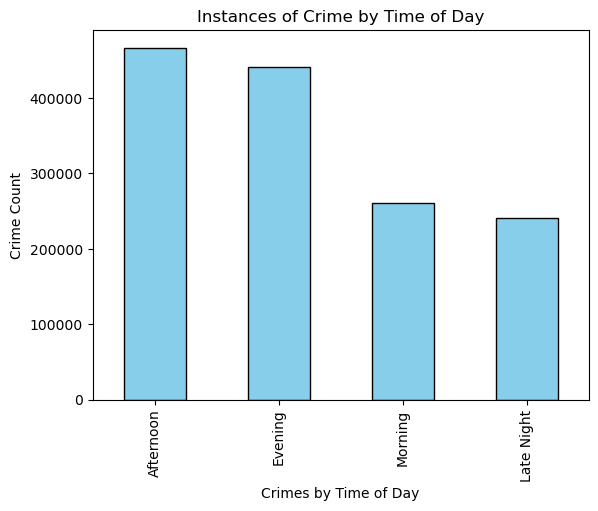

In [9]:
# Group the DataFrame by the 'Time_Category' column and count the instances in each category
category_counts = df['Part_of_Day'].value_counts()

# Plot the bar chart
category_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Instances of Crime by Time of Day')
plt.xlabel('Crimes by Time of Day')
plt.ylabel('Crime Count')

plt.show()

In [10]:
# Remove rows with NaN values
df = df.dropna(subset=['CMPLNT_FR_DT'])
df

CMPLNT_FR_DT CMPLNT_FR_TM  KY_CD                        OFNS_DESC  \
0         12/31/2015     23:45:00    113                          FORGERY   
1         12/31/2015     23:36:00    101  MURDER & NON-NEGL. MANSLAUGHTER   
2         12/31/2015     23:30:00    117                  DANGEROUS DRUGS   
3         12/31/2015     23:30:00    344     ASSAULT 3 & RELATED OFFENSES   
4         12/31/2015     23:25:00    344     ASSAULT 3 & RELATED OFFENSES   
...              ...          ...    ...                              ...   
1410310   01/01/2015     03:50:00    105                          ROBBERY   
1410311   01/01/2015     01:25:00    578                    HARRASSMENT 2   
1410312   01/01/2015     00:30:00    106                   FELONY ASSAULT   
1410313   06/30/2014     12:00:00    361    OFF. AGNST PUB ORD SENSBLTY &   
1410314   12/31/2001     16:00:00    107                         BURGLARY   

        CRM_ATPT_CPTD_CD   LAW_CAT_CD           JURIS_DESC    BORO_NM  \
0              COMPLETED       FELONY     N.Y. POLICE DEPT      BRONX   
1              COMPLETED       FELONY     N.Y. POLICE DEPT     QUEENS   
2              COMPLETED       FELONY     N.Y. POLICE DEPT  MANHATTAN   
3              COMPLETED  MISDEMEANOR     N.Y. POLICE DEPT     QUEENS   
4              COMPLETED  MISDEMEANOR     N.Y. POLICE DEPT  MANHATTAN   
...                  ...          ...                  ...        ...   
1410310        COMPLETED       FELONY     N.Y. POLICE DEPT  MANHATTAN   
1410311        COMPLETED    VIOLATION  N.Y. TRANSIT POLICE      BRONX   
1410312        COMPLETED       FELONY     N.Y. POLICE DEPT     QUEENS   
1410313        COMPLETED  MISDEMEANOR     N.Y. POLICE DEPT      BRONX   
1410314        COMPLETED       FELONY     N.Y. POLICE DEPT   BROOKLYN   

        Part_of_Day  
0           Evening  
1           Evening  
2           Evening  
3           Evening  
4           Evening  
...             ...  
1410310  Late Night  
1410311  Late Night  
1410312  Late Night  
1410313   Afternoon  
1410314   Afternoon  

[1410250 rows x 9 columns]

In [11]:
# Make a copy of the DataFrame to avoid SettingWithCopyWarning
df_clean = df.copy()
df_clean['CMPLNT_FR_DT'] = df_clean['CMPLNT_FR_DT'].astype(str)
df_clean['CMPLNT_FR_TM'] = df_clean['CMPLNT_FR_TM'].astype(str)

combined_datetime = pd.to_datetime(df_clean['CMPLNT_FR_DT'] + ' ' + df_clean['CMPLNT_FR_TM'], errors='coerce')
df_clean['Datetime'] = combined_datetime
df_clean.set_index('Datetime', inplace=True)
df_clean.dropna(inplace=True)
boroughs = df_clean['BORO_NM'].unique()

borough_series = {}

for borough in boroughs:
    # Filter data for each borough and resample to get daily crime counts
    borough_series[borough] = df_clean.loc[df_clean['BORO_NM'] == borough].resample('D').size()


df.copy(): This makes a copy of the data so that changes are made on the copy, not the original data. This avoids problems with the data being accidentally changed.
The date (CMPLNT_FR_DT) and time (CMPLNT_FR_TM) columns are converted to string type. This is probably because they need to be in a specific format to combine them later.
The date and time columns are combined into a single datetime column. This makes it easier to work with dates and times together.
Any rows where the date and time couldn't be properly combined (maybe due to wrong format or missing data) are removed.
Creating a Time Series for Each Borough:

The unique boroughs (like different areas or districts) are listed.
For each borough, the data is filtered to only include records from that borough.
The data for each borough is then resampled to a daily frequency, which means counting the number of events (like crimes) per day.
All this information is stored in a dictionary called borough_series, where each borough's name is a key and its daily event count is the value.
Overall, this code is setting up the data so that it can be analyzed over time, especially to look at trends like how many events happen each day in different boroughs. The next steps (not shown in this code) would likely involve using the ARIMA model to forecast future trends based on this data.

In [12]:
df = df_clean

In [13]:
df.tail()

CMPLNT_FR_DT CMPLNT_FR_TM  KY_CD  \
Datetime                                               
2015-01-01 03:50:00   01/01/2015     03:50:00    105   
2015-01-01 01:25:00   01/01/2015     01:25:00    578   
2015-01-01 00:30:00   01/01/2015     00:30:00    106   
2014-06-30 12:00:00   06/30/2014     12:00:00    361   
2001-12-31 16:00:00   12/31/2001     16:00:00    107   

                                         OFNS_DESC CRM_ATPT_CPTD_CD  \
Datetime                                                              
2015-01-01 03:50:00                        ROBBERY        COMPLETED   
2015-01-01 01:25:00                  HARRASSMENT 2        COMPLETED   
2015-01-01 00:30:00                 FELONY ASSAULT        COMPLETED   
2014-06-30 12:00:00  OFF. AGNST PUB ORD SENSBLTY &        COMPLETED   
2001-12-31 16:00:00                       BURGLARY        COMPLETED   

                      LAW_CAT_CD           JURIS_DESC    BORO_NM Part_of_Day  
Datetime                                                                      
2015-01-01 03:50:00       FELONY     N.Y. POLICE DEPT  MANHATTAN  Late Night  
2015-01-01 01:25:00    VIOLATION  N.Y. TRANSIT POLICE      BRONX  Late Night  
2015-01-01 00:30:00       FELONY     N.Y. POLICE DEPT     QUEENS  Late Night  
2014-06-30 12:00:00  MISDEMEANOR     N.Y. POLICE DEPT      BRONX   Afternoon  
2001-12-31 16:00:00       FELONY     N.Y. POLICE DEPT   BROOKLYN   Afternoon

## Standardization

In [15]:
series_2014_onwards = borough_series[borough][borough_series[borough].index.year >= 2014]
series_2014_onwards = series_2014_onwards.asfreq('D')
mean_of_series = series_2014_onwards.mean()
std_of_series = series_2014_onwards.std()

print(f"Mean of the series: {mean_of_series}")
print(f"Standard Deviation of the series: {std_of_series}")


Mean of the series: 60.59362549800797
Standard Deviation of the series: 11.580237196302134


## Model running


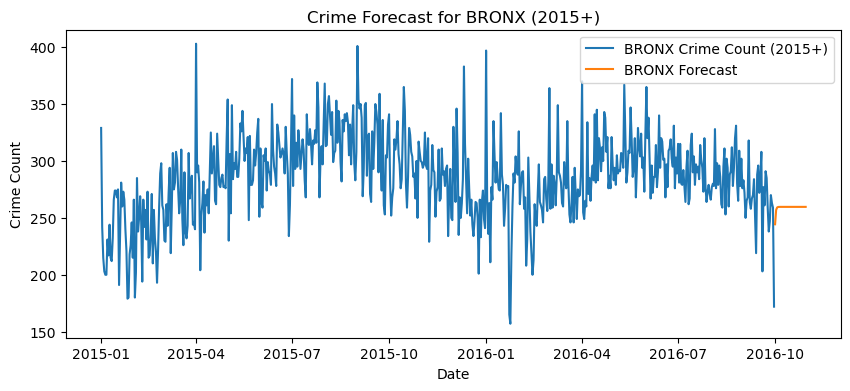

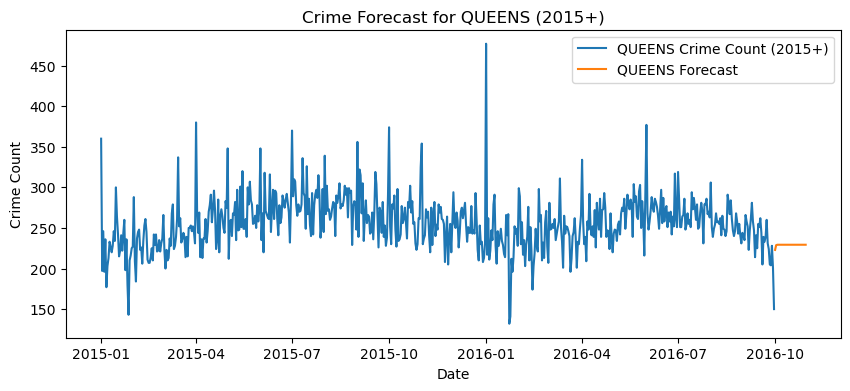

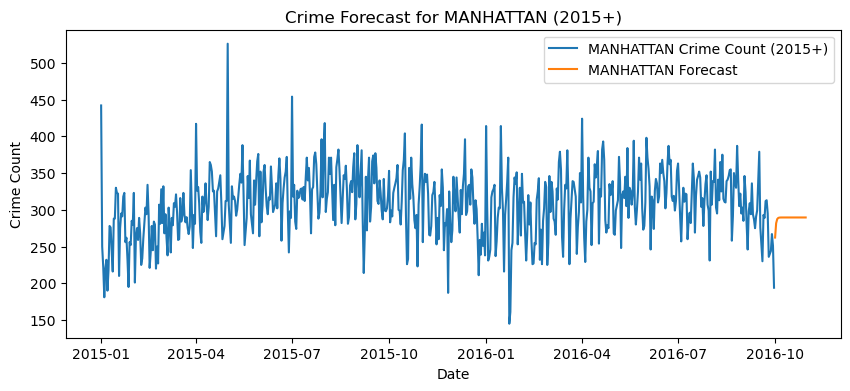

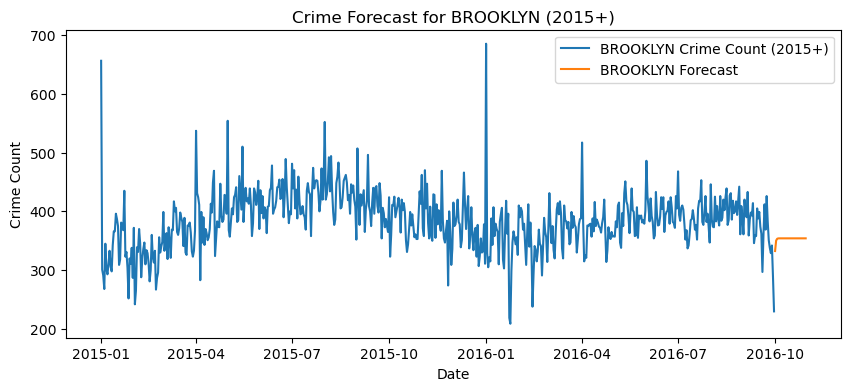

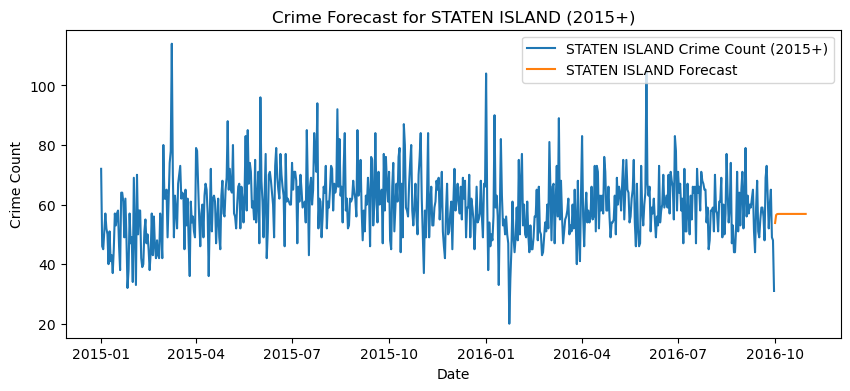

In [16]:
# Dictionary to hold the forecasts for each borough
forecasts = {}

# Number of periods (days) to forecast
forecast_periods = 30  # Assuming 30 days for a month

for borough in boroughs:
    series_2015_onwards = borough_series[borough][borough_series[borough].index.year >= 2015]
    series_2015_onwards = series_2015_onwards.asfreq('D')

    if not series_2015_onwards.empty:
        # Fit an ARIMA model
        model = ARIMA(series_2015_onwards, order=(1,1,1))
        fitted_model = model.fit()

        # Forecast the next month
        forecasts[borough] = fitted_model.forecast(steps=forecast_periods)

        # Plot the original data and the forecast
        plt.figure(figsize=(10, 4))  # Adjusted size
        plt.plot(series_2015_onwards, label=f'{borough} Crime Count (2015+)')
        forecast_dates = pd.date_range(series_2015_onwards.index[-1] + pd.Timedelta(days=1), periods=forecast_periods, freq='D')
        plt.plot(forecast_dates, forecasts[borough], label=f'{borough} Forecast')
        plt.title(f'Crime Forecast for {borough} (2015+)')
        plt.xlabel('Date')
        plt.ylabel('Crime Count')
        plt.legend()
        plt.show()


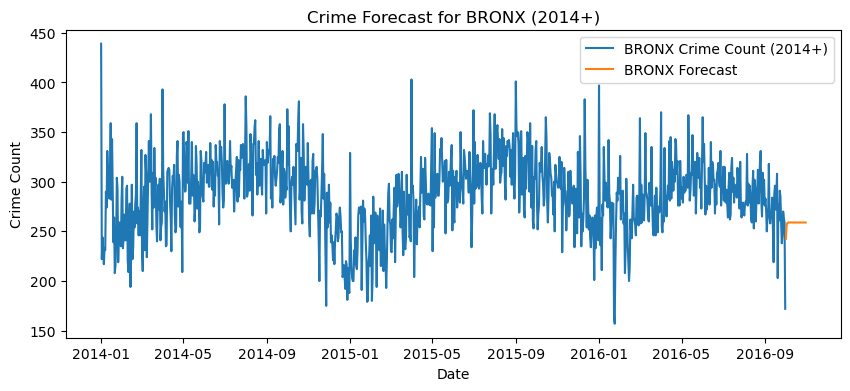

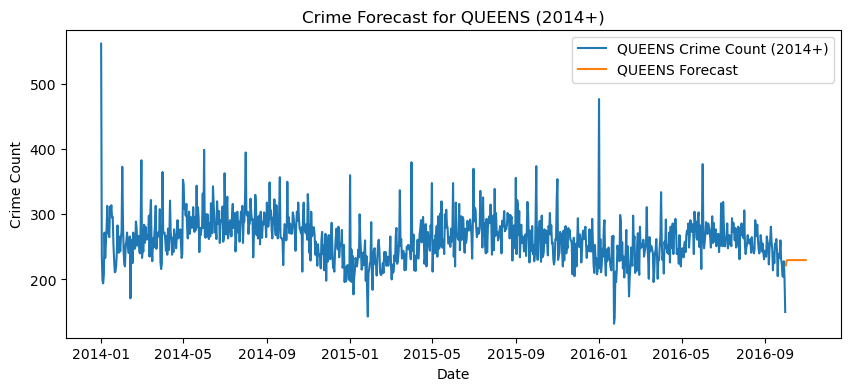

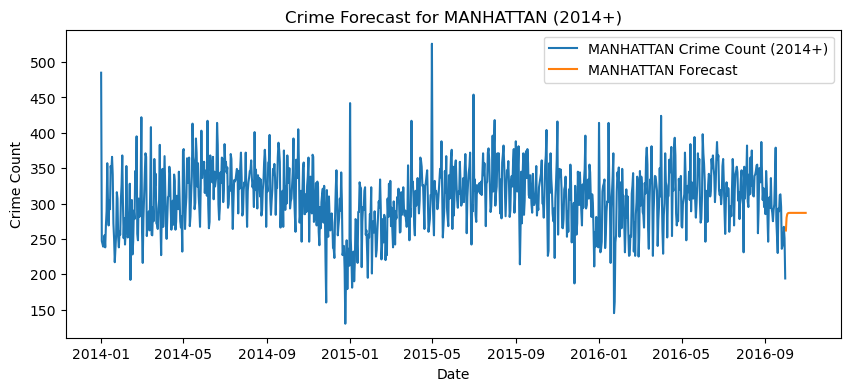

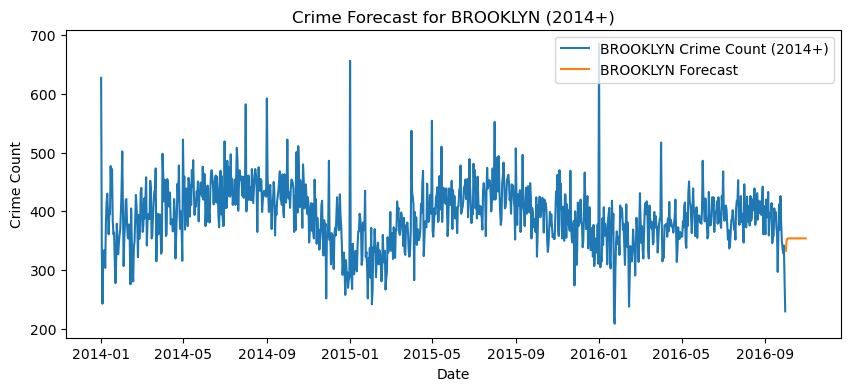

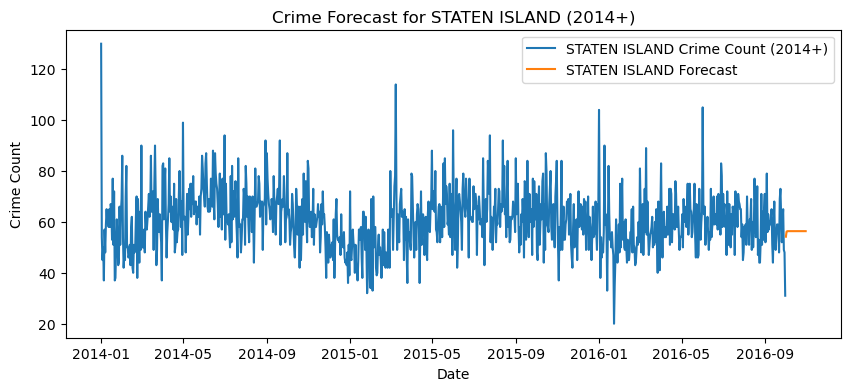

In [19]:
# Dictionary to hold the forecasts for each borough
forecasts = {}

# Number of periods (days) to forecast
forecast_periods = 30  # Assuming 30 days for a month

for borough in boroughs:
    # Filter the data to include only entries from 2014 and later
    series_2014_onwards = borough_series[borough][borough_series[borough].index.year >= 2014]
    series_2014_onwards = series_2014_onwards.asfreq('D')

    if not series_2014_onwards.empty:
        # Fit an ARIMA model
        model = ARIMA(series_2014_onwards, order=(1,1,1))
        fitted_model = model.fit()

        # Forecast the next month
        forecasts[borough] = fitted_model.forecast(steps=forecast_periods)

        # Plot the original data and the forecast
        plt.figure(figsize=(10, 4))  # Adjusted size
        plt.plot(series_2014_onwards, label=f'{borough} Crime Count (2014+)')
        forecast_dates = pd.date_range(series_2014_onwards.index[-1] + pd.Timedelta(days=1), periods=forecast_periods, freq='D')
        plt.plot(forecast_dates, forecasts[borough], label=f'{borough} Forecast')
        plt.title(f'Crime Forecast for {borough} (2014+)')
        plt.xlabel('Date')
        plt.ylabel('Crime Count')
        plt.legend()
        plt.show()
    else:
        print(f"No data available for {borough} from 2014 onwards.")



In [20]:
evaluation_results = {}
borough_to_evaluate = 'STATEN ISLAND'  # Replace with your specific borough
if borough_to_evaluate in forecasts and borough_to_evaluate in evaluation_results:
    # Ensure that forecast and actual have the same length
    min_length = min(len(forecasts[borough_to_evaluate]), len(evaluation_results[borough_to_evaluate]))
    if min_length > 0:
        actual = evaluation_results[borough_to_evaluate].iloc[:min_length]
        predicted = forecasts[borough_to_evaluate].iloc[:min_length]
        mse = mean_squared_error(actual, predicted)
        print(f'The Mean Squared Error of our forecasts for {borough_to_evaluate} is {mse}')
    else:
        print(f"Not enough data to calculate MSE for {borough_to_evaluate}.")
else:
    print(f"Forecast or actual data not available for {borough_to_evaluate}.")


Forecast or actual data not available for STATEN ISLAND.


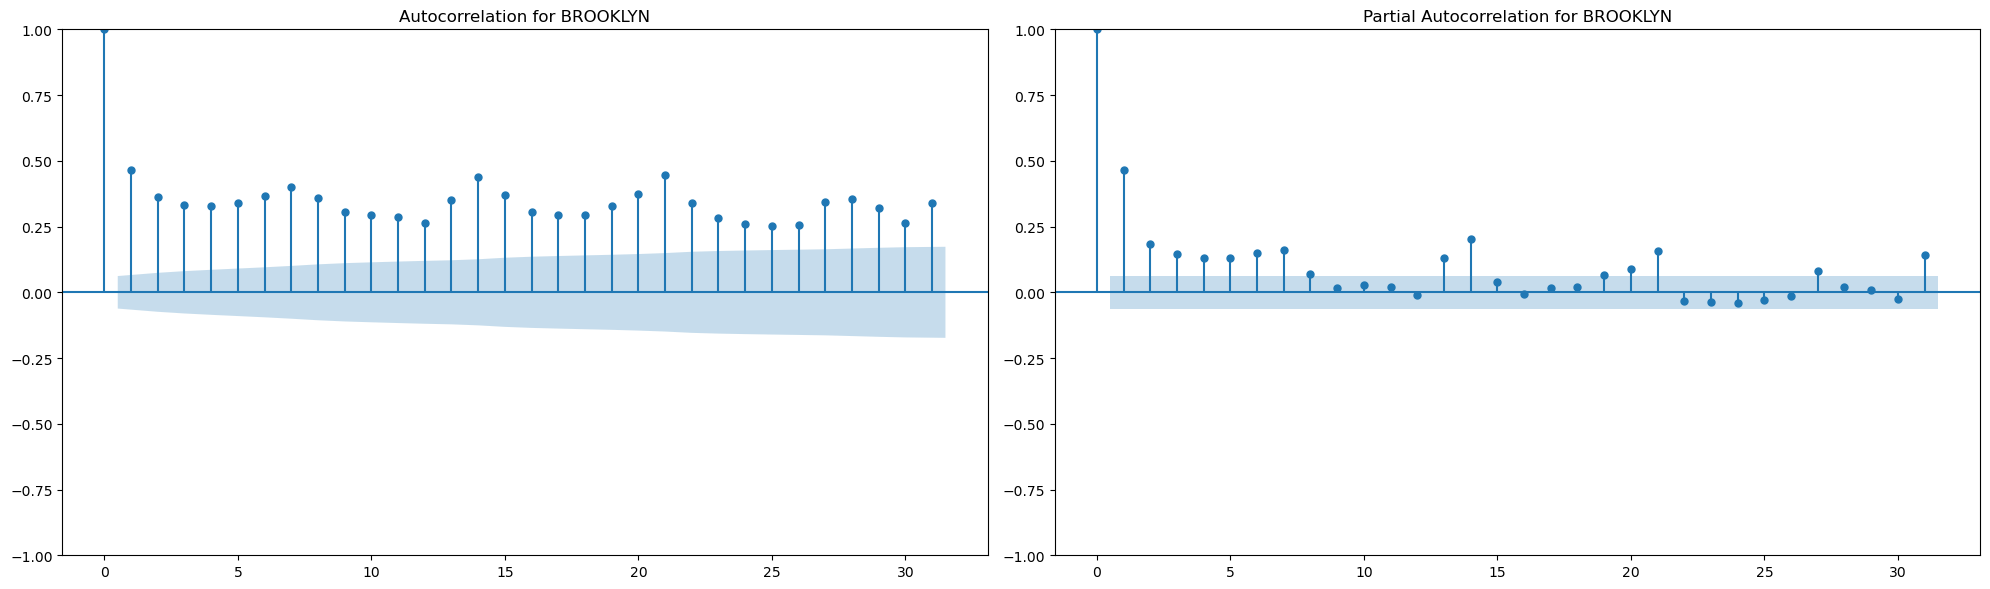

In [24]:
# Choose one borough for the example
selected_borough = boroughs[3]  # Replace with the desired borough name 

# Ensure that the time series for the selected borough is correctly filtered for the year 2015 onwards
series_2014_onwards = borough_series[selected_borough][borough_series[selected_borough].index.year >= 2014]

if not series_2014_onwards.empty:
    # Drop any NaN values in the series
    series_clean = series_2014_onwards.dropna()

    # Plot ACF and PACF
    plt.figure(figsize=(20, 6))
    plt.subplot(121)
    plot_acf(series_clean, ax=plt.gca())
    plt.title(f'Autocorrelation for {selected_borough}')

    plt.subplot(122)
    plot_pacf(series_clean, ax=plt.gca())
    plt.title(f'Partial Autocorrelation for {selected_borough}')

    plt.tight_layout()
    plt.show()



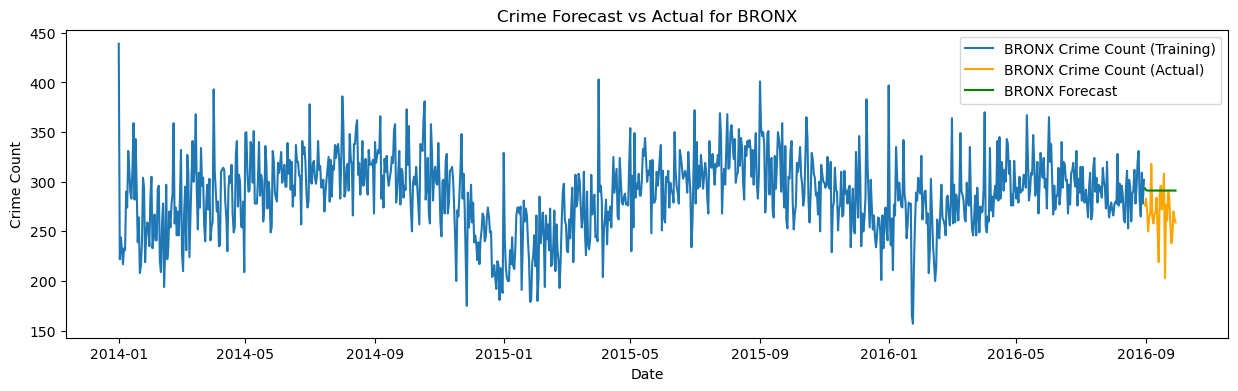

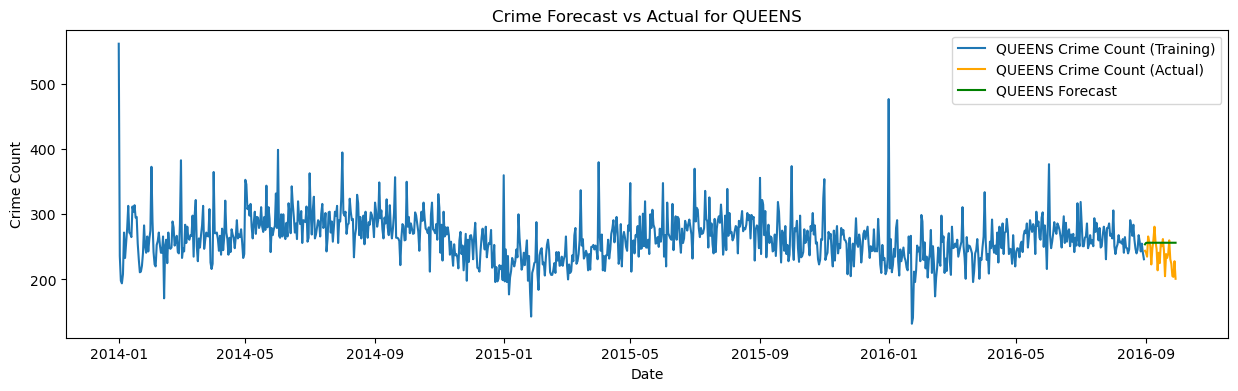

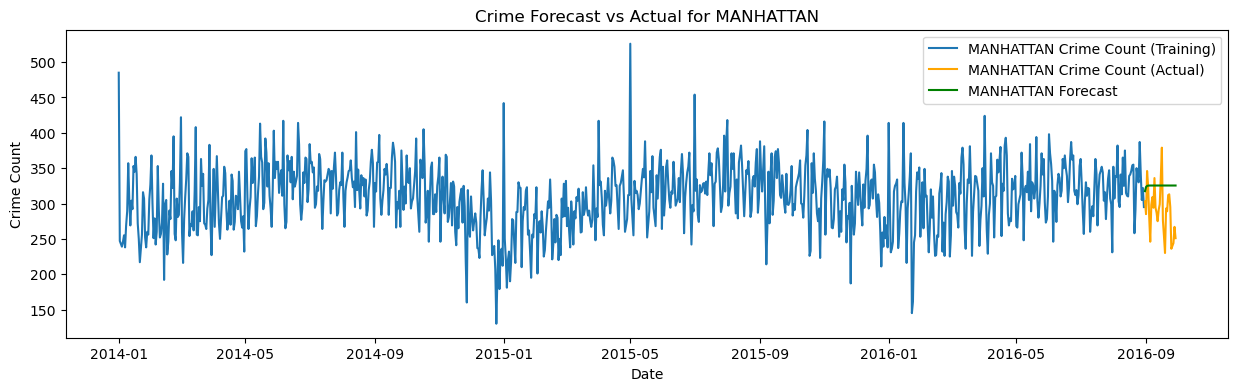

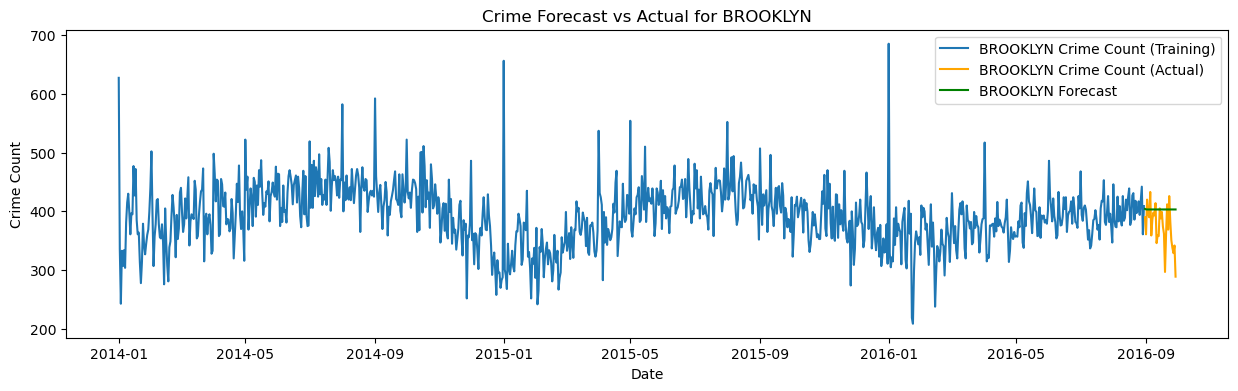

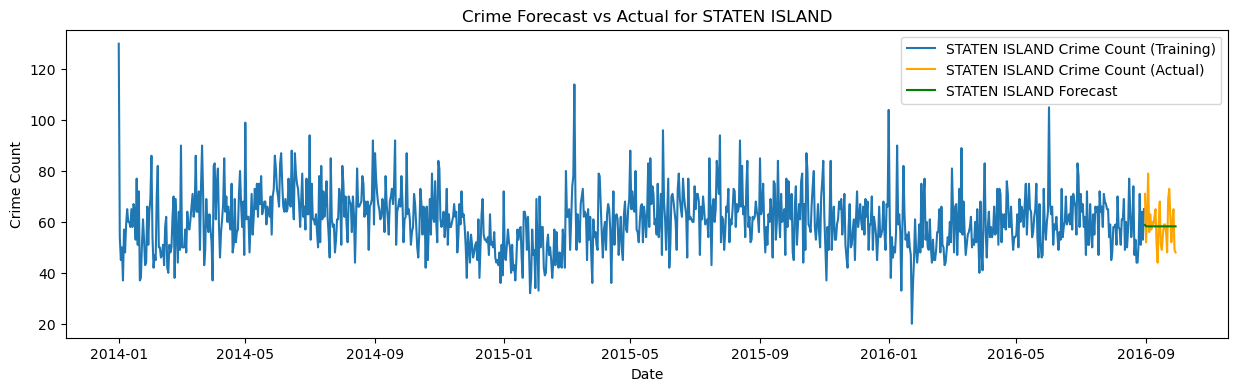

The Mean Squared Error of our forecasts for BRONX is 1059.4561345585553


In [25]:
forecasts = {}
evaluation_results = {}
training_end = pd.to_datetime('2016-8-30')

# Number of periods (days) to forecast 
forecast_periods = 30  # Assuming 30 days for a month

for borough in boroughs:
    series = borough_series[borough]
    series_2014_onwards = series[series.index.year >= 2014].asfreq('D', fill_value=0)

    # Split the data into training and test sets
    train = series_2014_onwards[:training_end]
    test = series_2014_onwards[training_end + pd.Timedelta(days=1):training_end + pd.Timedelta(days=forecast_periods)]
    
    evaluation_results[borough] = test
    
    if not train.empty:
        # Fit an ARIMA model on the training set
        model = ARIMA(train, order=(1,1,1))
        fitted_model = model.fit()

        # Forecast the next month
        forecast = fitted_model.get_forecast(steps=forecast_periods).predicted_mean
        
        # Store forecast and actual values for later evaluation
        forecasts[borough] = forecast
        
        # Plot the training data, the forecast, and the actual observations
        plt.figure(figsize=(15, 4))
        plt.plot(train, label=f'{borough} Crime Count (Training)')
        plt.plot(test, label=f'{borough} Crime Count (Actual)', color='orange')
        plt.plot(forecast, label=f'{borough} Forecast', color='green')
        plt.title(f'Crime Forecast vs Actual for {borough}')
        plt.xlabel('Date')
        plt.ylabel('Crime Count')
        plt.legend()
        plt.show()


borough_to_evaluate = 'BRONX'  # Replace with specific borough
if borough_to_evaluate in forecasts and borough_to_evaluate in evaluation_results:
    # Ensure that forecast and actual have the same length
    min_length = min(len(forecasts[borough_to_evaluate]), len(evaluation_results[borough_to_evaluate]))
    if min_length > 0:
        actual = evaluation_results[borough_to_evaluate].iloc[:min_length]
        predicted = forecasts[borough_to_evaluate].iloc[:min_length]
        mse = mean_squared_error(actual, predicted)
        print(f'The Mean Squared Error of our forecasts for {borough_to_evaluate} is {mse}')



## Seasonal order 32 

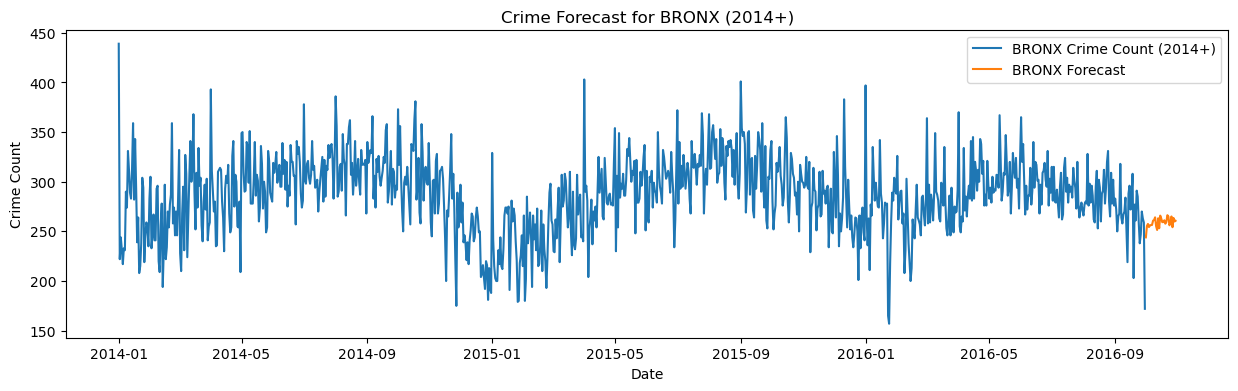

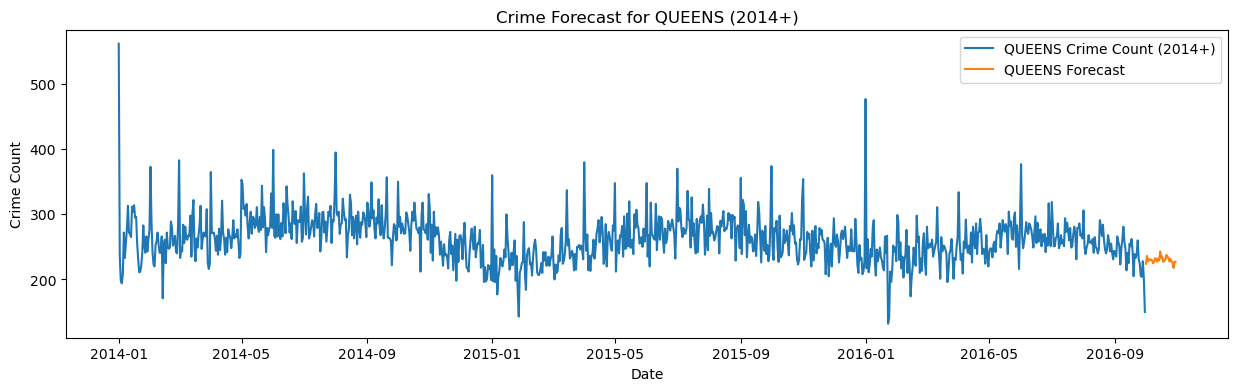

C:\Users\tever\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


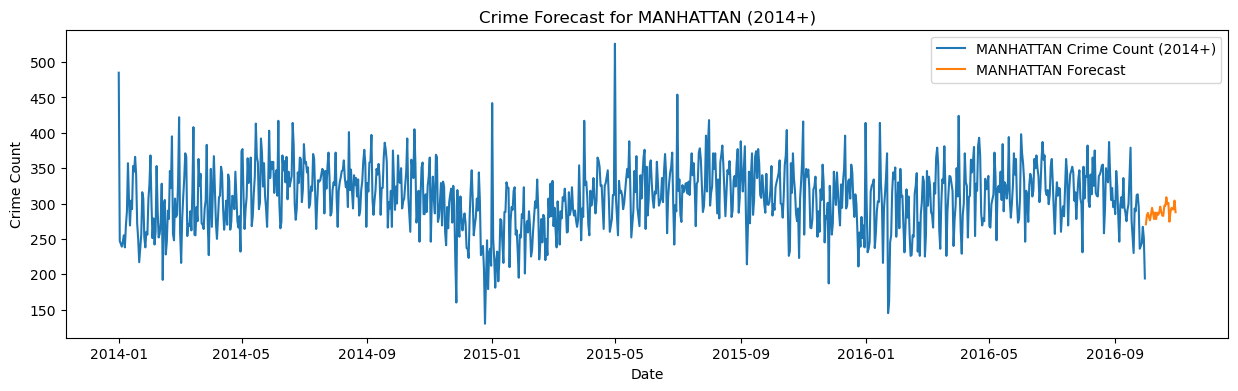

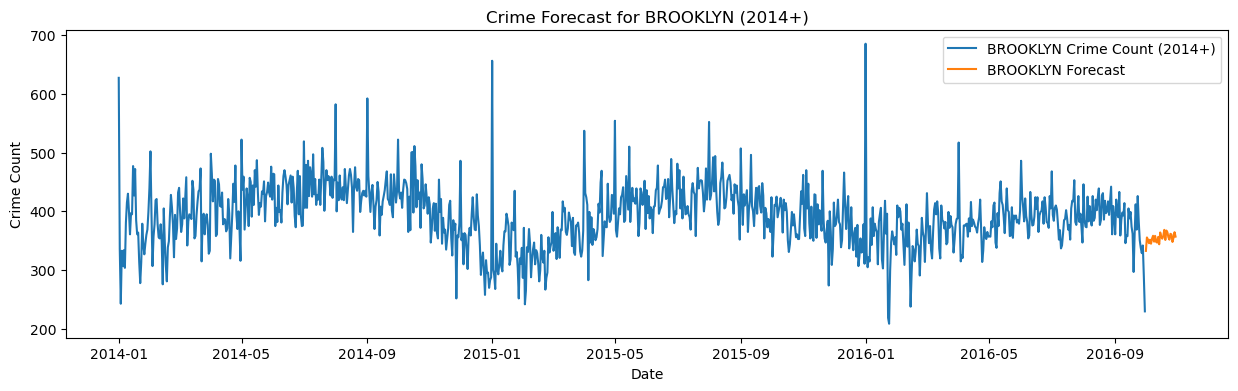

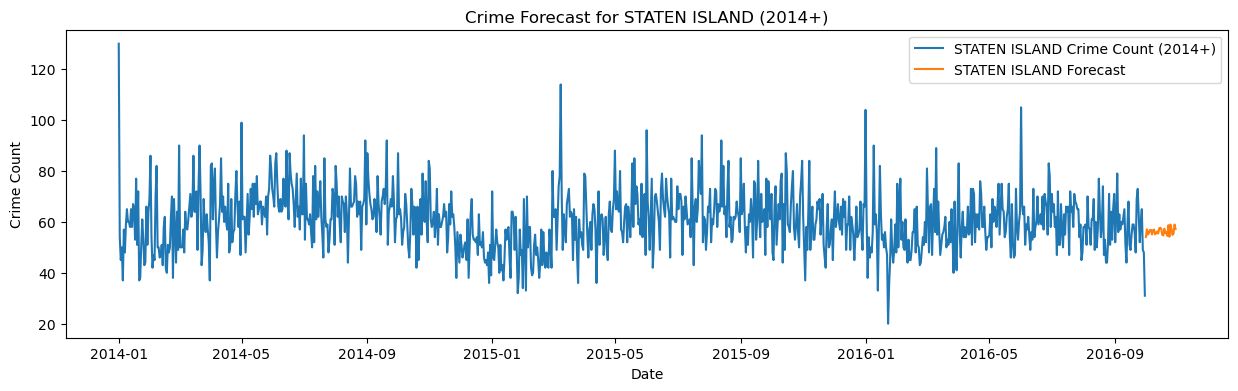

In [49]:
# Dictionary to hold the forecasts for each borough
forecasts = {}

# Number of periods (days) to forecast
forecast_periods = 30  # Assuming 30 days for a month

for borough in boroughs:
    series_2014_onwards = borough_series[borough][borough_series[borough].index.year >= 2014]
    series_2014_onwards = series_2014_onwards.asfreq('D', fill_value=0)  # Fill missing values with 0

    if not series_2014_onwards.empty:
        # Fit a SARIMA model
        model = SARIMAX(series_2014_onwards, 
                        order=(1,1,1), 
                        seasonal_order=(1,1,1,32))
        fitted_model = model.fit()

        # Forecast the next month
        forecasts[borough] = fitted_model.get_forecast(steps=forecast_periods).predicted_mean

        # Plot the original data and the forecast
        plt.figure(figsize=(15, 4))  # Adjusted size
        plt.plot(series_2014_onwards, label=f'{borough} Crime Count (2014+)')
        forecast_dates = pd.date_range(series_2014_onwards.index[-1] + pd.Timedelta(days=1), periods=forecast_periods, freq='D')
        plt.plot(forecast_dates, forecasts[borough], label=f'{borough} Forecast')
        plt.title(f'Crime Forecast for {borough} (2014+)')
        plt.xlabel('Date')
        plt.ylabel('Crime Count')
        plt.legend()
        plt.show()


        

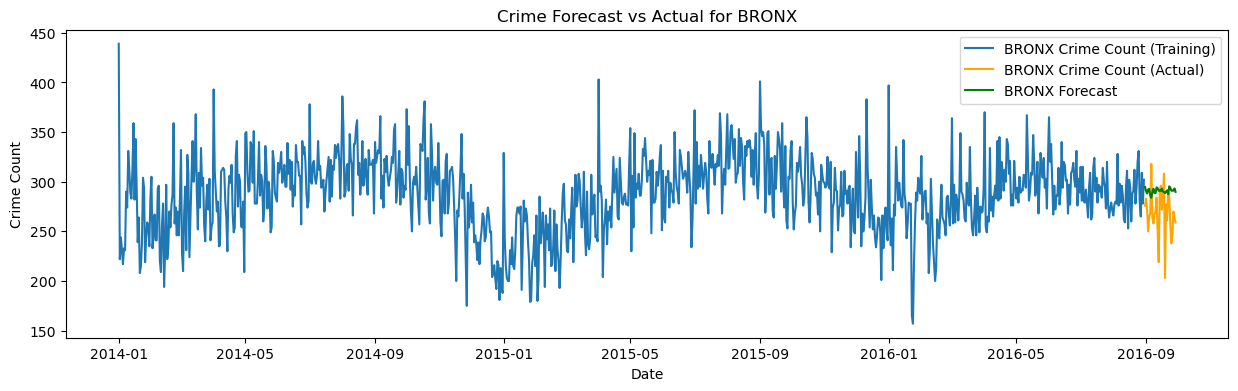

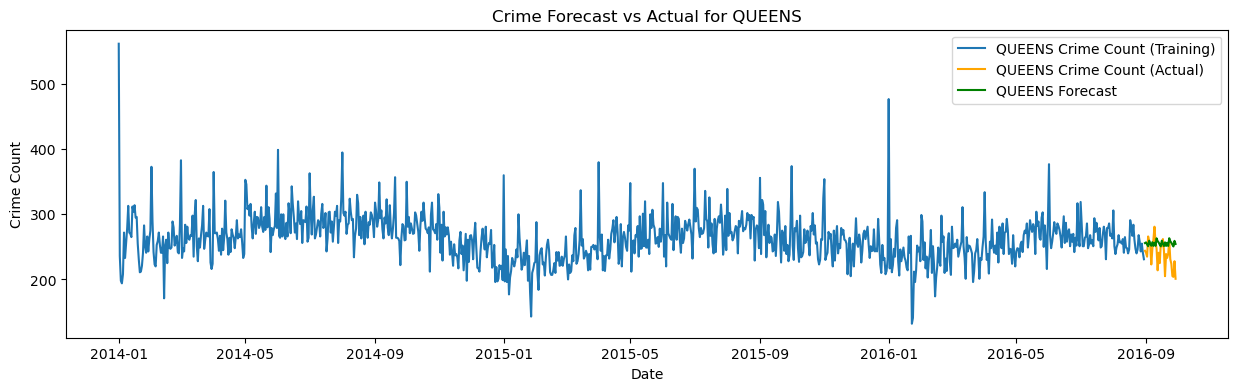

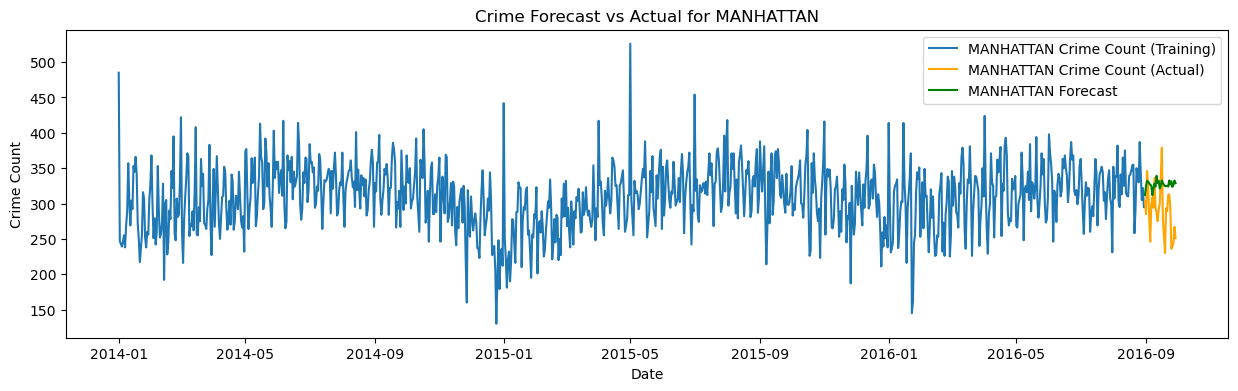

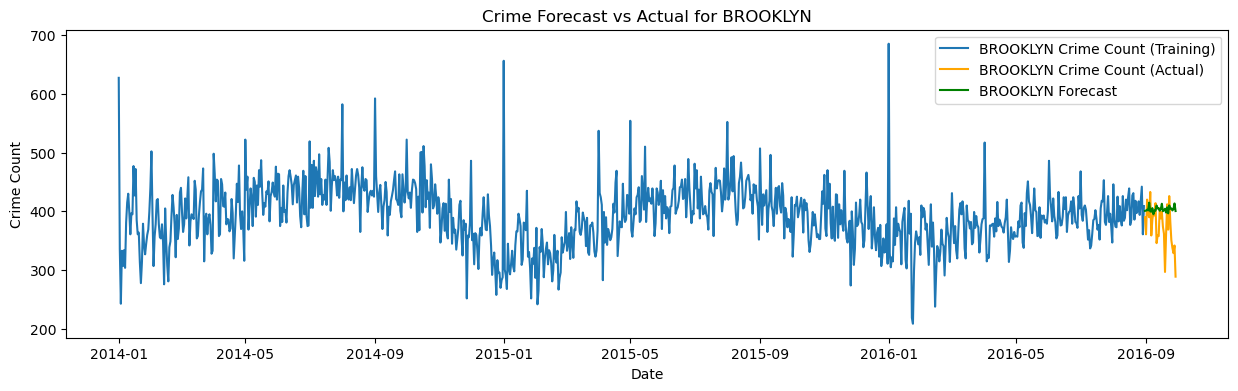

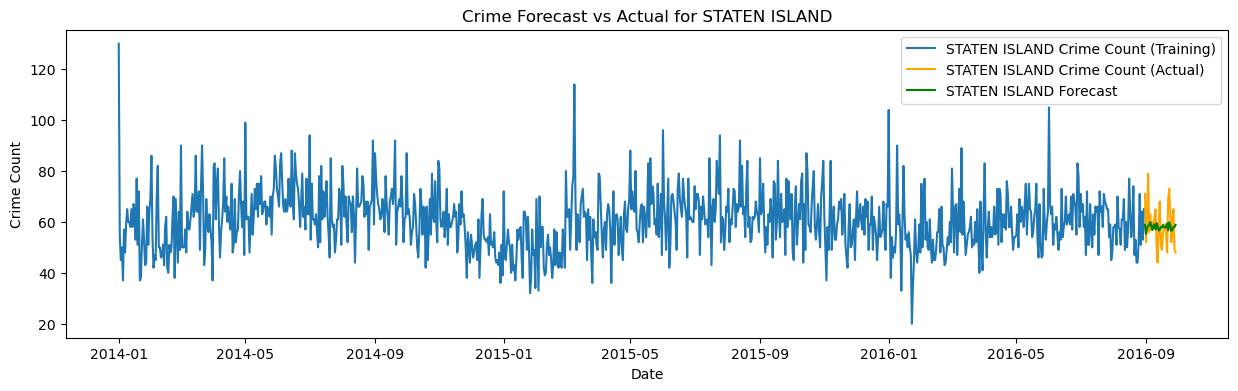

The Mean Squared Error of our forecasts for BRONX is 1071.471451514231


In [44]:
# Dictionary to hold the forecasts for each borough
forecasts = {}
evaluation_results = {}

# Define the training period 
training_end = pd.to_datetime('2016-8-30')

# Number of periods (days) to forecast 
forecast_periods = 30  # Assuming 30 days for a month

for borough in boroughs:
    series = borough_series[borough]
    series_2014_onwards = series[series.index.year >= 2014].asfreq('D', fill_value=0)

    # Split the data into training and test sets
    train = series_2014_onwards[:training_end]
    test = series_2014_onwards[training_end + pd.Timedelta(days=1):training_end + pd.Timedelta(days=forecast_periods)]

    # Store the actual test data for evaluation
    evaluation_results[borough] = test
    
    if not train.empty:
        # Fit a SARIMA model on the training set
        model = SARIMAX(train, 
                        order=(1,1,1), 
                        seasonal_order=(1,1,1,12))
        fitted_model = model.fit()

        # Forecast the next month
        forecast = fitted_model.get_forecast(steps=forecast_periods).predicted_mean
        forecasts[borough] = forecast
        evaluation_results[borough] = test
        
        # Plot the training data, the forecast, and the actual observations
        plt.figure(figsize=(15, 4))
        plt.plot(train, label=f'{borough} Crime Count (Training)')
        plt.plot(test, label=f'{borough} Crime Count (Actual)', color='orange')
        plt.plot(forecast, label=f'{borough} Forecast', color='green')
        plt.title(f'Crime Forecast vs Actual for {borough}')
        plt.xlabel('Date')
        plt.ylabel('Crime Count')
        plt.legend()
        plt.show()

borough_to_evaluate = 'BRONX'  # Replace with specific borough
if borough_to_evaluate in forecasts and borough_to_evaluate in evaluation_results:
    # Ensure that forecast and actual have the same length
    min_length = min(len(forecasts[borough_to_evaluate]), len(evaluation_results[borough_to_evaluate]))
    if min_length > 0:
        actual = evaluation_results[borough_to_evaluate].iloc[:min_length]
        predicted = forecasts[borough_to_evaluate].iloc[:min_length]
        mse = mean_squared_error(actual, predicted)
        print(f'The Mean Squared Error of our forecasts for {borough_to_evaluate} is {mse}')

C:\Users\tever\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\tever\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


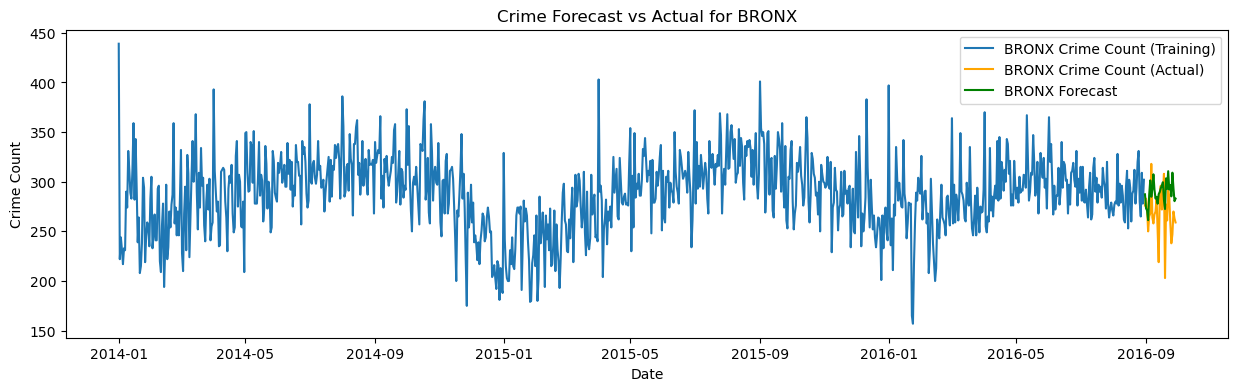

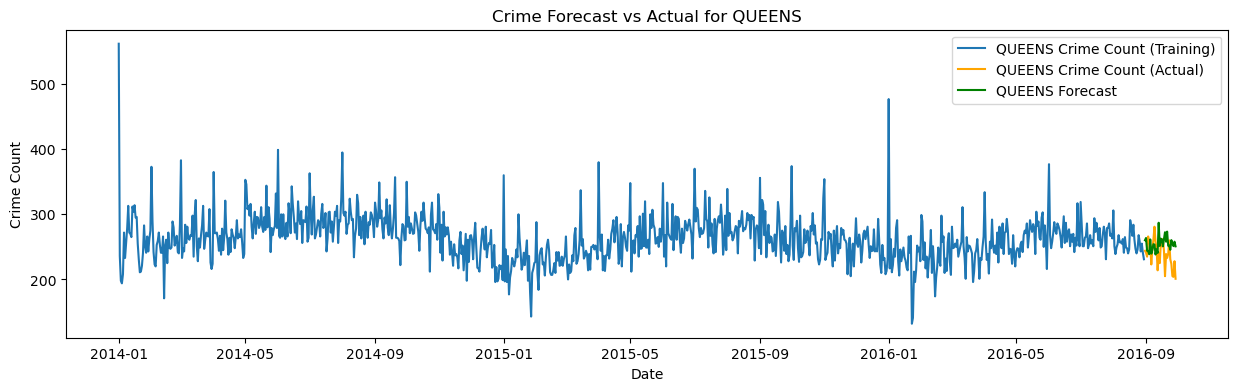

C:\Users\tever\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\tever\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


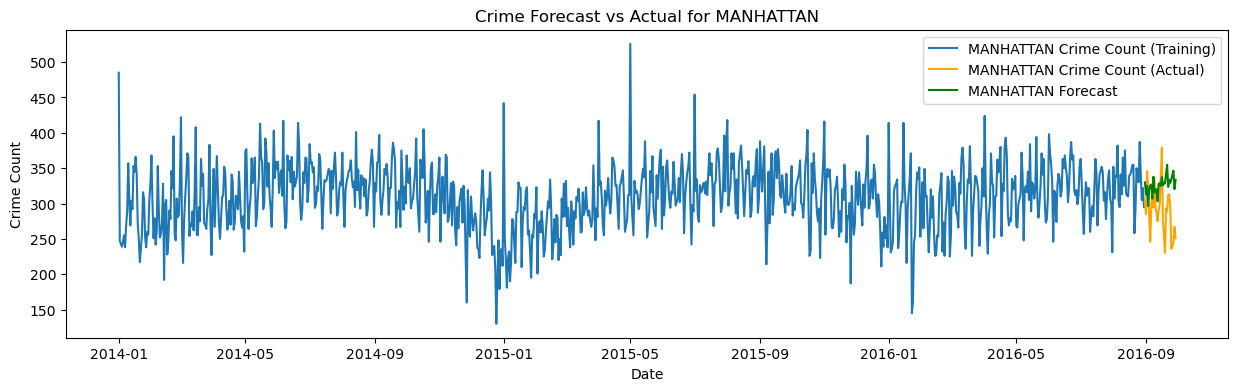

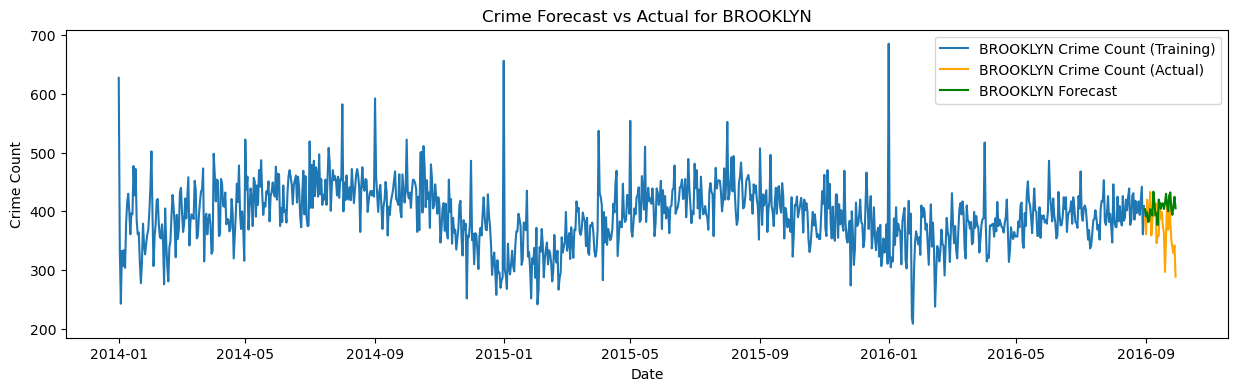

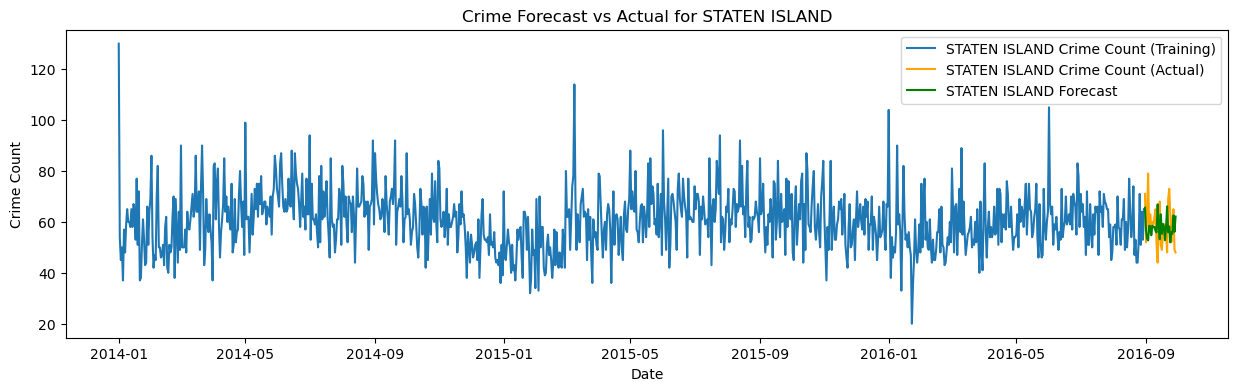

The Mean Squared Error of our forecasts for BRONX is 998.0675048365212


In [52]:
forecasts = {}
evaluation_results = {}

training_end = pd.to_datetime('2016-8-30')

forecast_periods = 30  # Assuming 30 days for a month

for borough in boroughs:
    series = borough_series[borough]
    series_2014_onwards = series[series.index.year >= 2014].asfreq('D', fill_value=0)

    train = series_2014_onwards[:training_end]
    test = series_2014_onwards[training_end + pd.Timedelta(days=1):training_end + pd.Timedelta(days=forecast_periods)]

    evaluation_results[borough] = test
    
    if not train.empty:
        # Fit a SARIMA model on the training set
        model = SARIMAX(train, 
                        order=(1,1,2), 
                        seasonal_order=(0,2,2,32))
        fitted_model = model.fit()

        # Forecast the next month
        forecast = fitted_model.get_forecast(steps=forecast_periods).predicted_mean
        forecasts[borough] = forecast
        evaluation_results[borough] = test
        
        # Plot the training data, the forecast, and the actual observations
        plt.figure(figsize=(15, 4))
        plt.plot(train, label=f'{borough} Crime Count (Training)')
        plt.plot(test, label=f'{borough} Crime Count (Actual)', color='orange')
        plt.plot(forecast, label=f'{borough} Forecast', color='green')
        plt.title(f'Crime Forecast vs Actual for {borough}')
        plt.xlabel('Date')
        plt.ylabel('Crime Count')
        plt.legend()
        plt.show()

C:\Users\tever\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


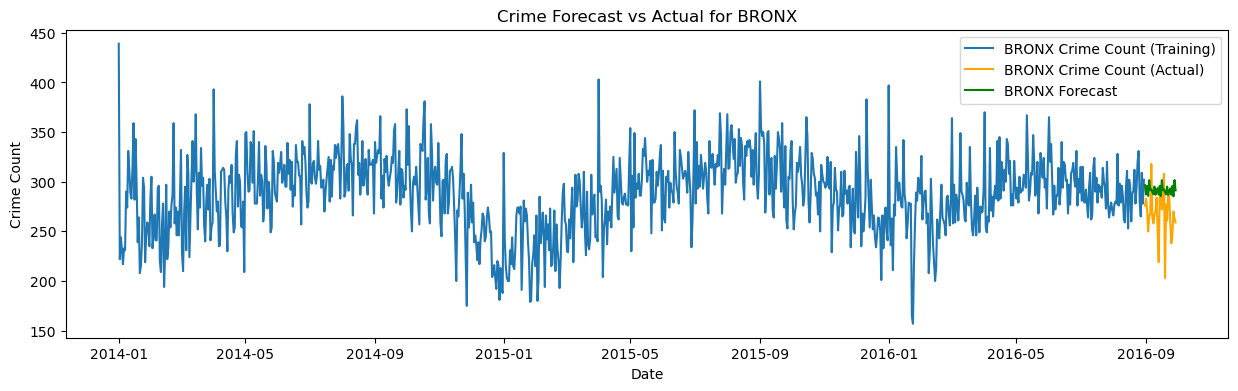

C:\Users\tever\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


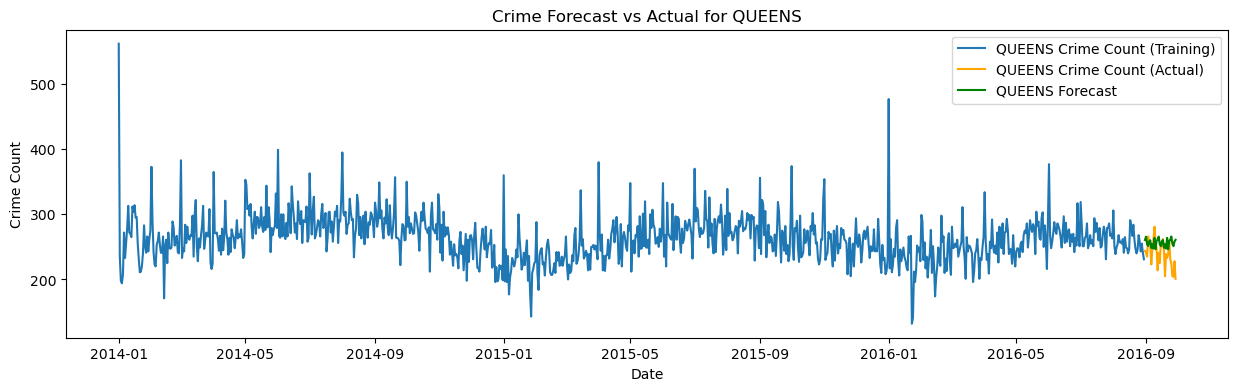

C:\Users\tever\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


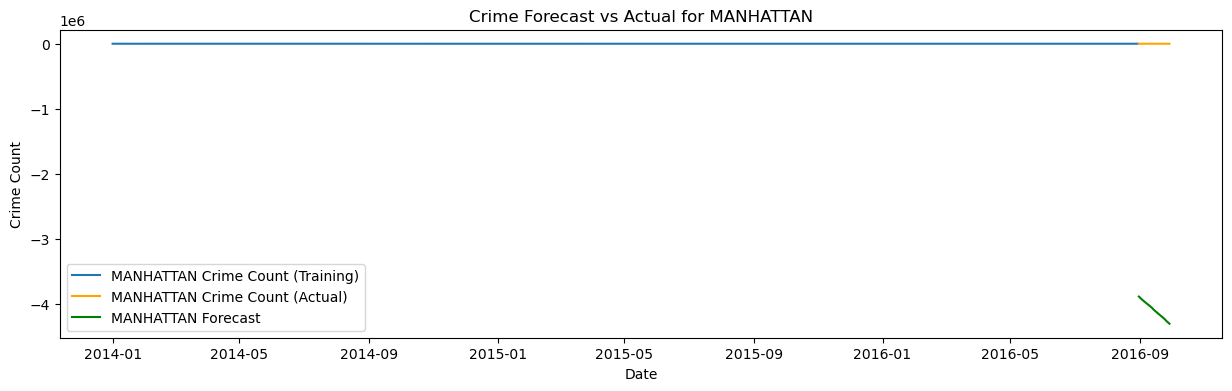

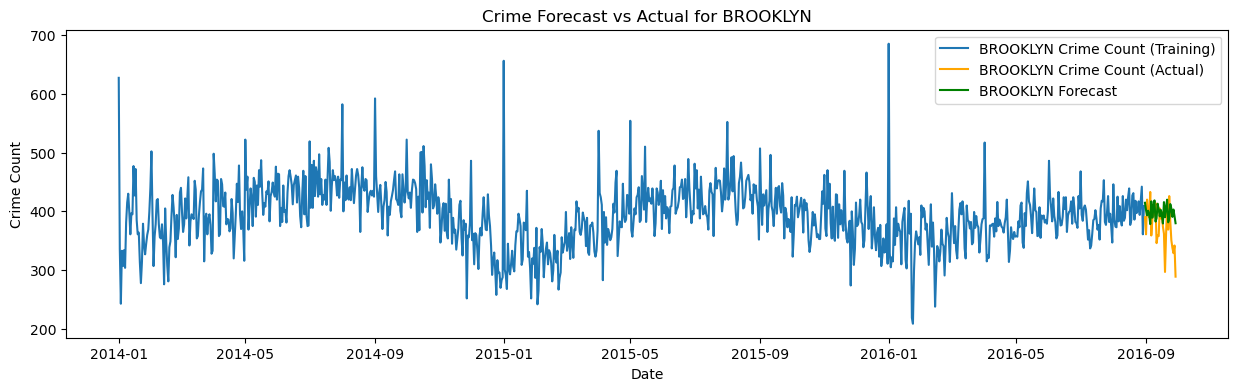

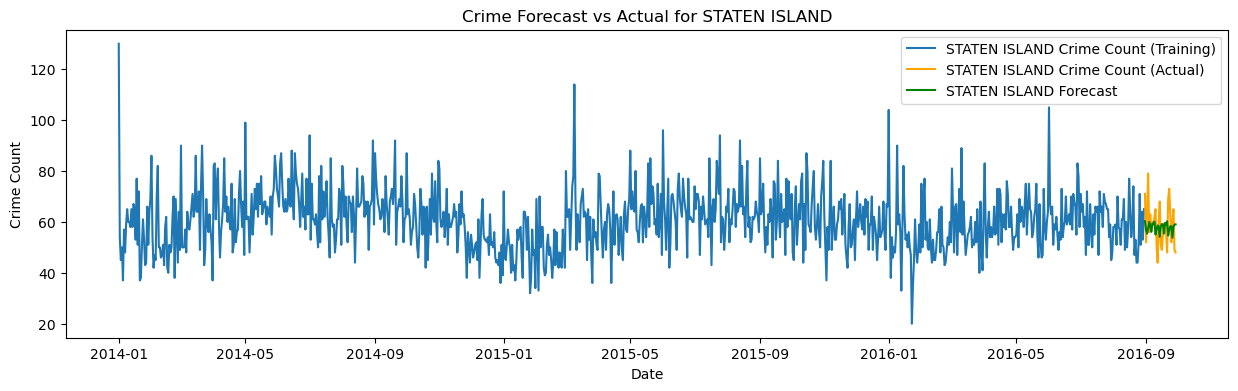

The Mean Squared Error of our forecasts for BRONX is 1092.794004230906


In [53]:
# Dictionary to hold the forecasts for each borough
forecasts = {}
# Dictionary to hold the actual test data for each borough
evaluation_results = {}

# Define the training period 
training_end = pd.to_datetime('2016-8-30')

# Number of periods (days) to forecast
forecast_periods = 30  # Assuming 30 days for a month

for borough in boroughs:
    series = borough_series[borough]
    series_2014_onwards = series[series.index.year >= 2014].asfreq('D', fill_value=0)

    train = series_2014_onwards[:training_end]
    test = series_2014_onwards[training_end + pd.Timedelta(days=1):training_end + pd.Timedelta(days=forecast_periods)]

    evaluation_results[borough] = test
    
    if not train.empty:
        # Fit a SARIMA model on the training set
        model = SARIMAX(train, 
                        order=(1,1,2), 
                        seasonal_order=(0,2,2,12))
        fitted_model = model.fit()
        forecast = fitted_model.get_forecast(steps=forecast_periods).predicted_mean
        forecasts[borough] = forecast
        evaluation_results[borough] = test
        
        # Plot the training data, the forecast, and the actual observations
        plt.figure(figsize=(15, 4))
        plt.plot(train, label=f'{borough} Crime Count (Training)')
        plt.plot(test, label=f'{borough} Crime Count (Actual)', color='orange')
        plt.plot(forecast, label=f'{borough} Forecast', color='green')
        plt.title(f'Crime Forecast vs Actual for {borough}')
        plt.xlabel('Date')
        plt.ylabel('Crime Count')
        plt.legend()
        plt.show()
    else:
        print(f"No data available for {borough} from 2014 onwards.")





borough_to_evaluate = 'BRONX'  # Replace with specific borough
if borough_to_evaluate in forecasts and borough_to_evaluate in evaluation_results:
    # Ensure that forecast and actual have the same length
    min_length = min(len(forecasts[borough_to_evaluate]), len(evaluation_results[borough_to_evaluate]))
    if min_length > 0:
        actual = evaluation_results[borough_to_evaluate].iloc[:min_length]
        predicted = forecasts[borough_to_evaluate].iloc[:min_length]
        mse = mean_squared_error(actual, predicted)
        print(f'The Mean Squared Error of our forecasts for {borough_to_evaluate} is {mse}')

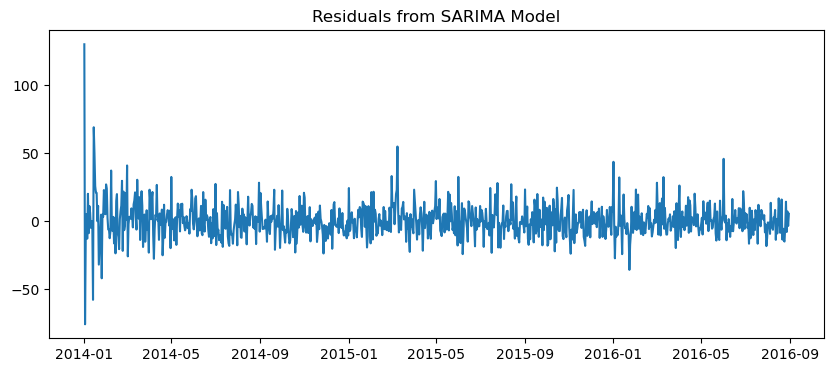

Statistics=396.725, p=0.000
Sample does not look Gaussian (reject H0)
Ljung-Box test p-value: lb_pvalue
AIC: 7373.937444425117


In [46]:
fitted_model = model.fit()
# Plot the residuals
residuals = fitted_model.resid
plt.figure(figsize=(10, 4))
plt.plot(residuals)
plt.title('Residuals from SARIMA Model')
plt.show()

# Statistical test for normality
from scipy.stats import normaltest
stat, p = normaltest(residuals)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# Interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

# Ljung-Box test
from statsmodels.stats.diagnostic import acorr_ljungbox
lbvalue, pvalue = acorr_ljungbox(residuals, lags=[10], return_df=False)
print(f'Ljung-Box test p-value: {pvalue}')

# Calculate AIC
print(f'AIC: {fitted_model.aic}')

## Grid Search


In [ ]:
# Define the p, d, and q parameters to take any value between 0 and 2
p = d = q = range(0, 3)

# Define the seasonal p, d, q and periodicity
sp = sd = sq = range(0, 3)
seasonal_period = 32  # Assuming monthly data with yearly seasonality

# Generate all different combinations of p, d, and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, d, q triplets
seasonal_pdq = [(x[0], x[1], x[2], seasonal_period) for x in list(itertools.product(sp, sd, sq))]

warnings.filterwarnings("ignore")  

best_aic = float("inf")
best_pdq = None
best_seasonal_pdq = None
best_model = None

# Grid search for the best ARIMA parameters
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            temp_model = SARIMAX(series_2014_onwards,
                                 order=param,
                                 seasonal_order=param_seasonal,
                                 enforce_stationarity=False,
                                 enforce_invertibility=False)

            results = temp_model.fit()

            # Compare this model's AIC with the best so far
            if results.aic < best_aic:
                best_aic = results.aic
                best_pdq = param
                best_seasonal_pdq = param_seasonal
                best_model = results
        except:
            # Some parameter combinations may not converge and will throw an error
            continue

print(f"Best SARIMA{best_pdq}x{best_seasonal_pdq}12 model - AIC:{best_aic}")


** In this iteration of the notebook, Grid search took over 30 hours so I did not recompile it.

## MSE


In [ ]:
borough_to_evaluate = 'BRONX'  # Replace specific borough
if borough_to_evaluate in forecasts and borough_to_evaluate in evaluation_results:
    # Ensure that forecast and actual have the same length
    min_length = min(len(forecasts[borough_to_evaluate]), len(evaluation_results[borough_to_evaluate]))
    if min_length > 0:
        actual = evaluation_results[borough_to_evaluate].iloc[:min_length]
        predicted = forecasts[borough_to_evaluate].iloc[:min_length]
        mse = mean_squared_error(actual, predicted)
        print(f'The Mean Squared Error of our forecasts for {borough_to_evaluate} is {mse}')
    else:
        print(f"Not enough data to calculate MSE for {borough_to_evaluate}.")